# Analysis Challenge Assignment 4
#### Author: Madeline Maeloa
#### For this analysis challenge, I will be analyzing a network of friends. The nodes/vertexes are the individual people in the friendship network. An edge/link/tie would be if they have friends in common  with each other.

## Importing

In [46]:
# Importing the neccessary modules needed for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Visualizing the Network

In [53]:
# Importing the data that I gathered for this assignment
SNAdata = pd.read_csv("ACA4_Data.csv", index_col = 0)

# Graphing the data by turning each name into the index that it corresponds to
# This is the variable called index
index = nx.Graph(SNAdata.to_numpy())

# Assigning a name to each index
# This is assigned to the variable called name
names = {0: 'Natasha', 1: 'Madeline', 2: 'Rebecca', 3: 'James', 4: 'Ernest', 5: 'Jun Jie', 6: 'Sophia', 7: 'Micheline', 8: 'Taher', 9: 'Jeff'}

# Relabeling the nodes by replacing the indexes with corresponding names
name = nx.relabel_nodes(index, names)

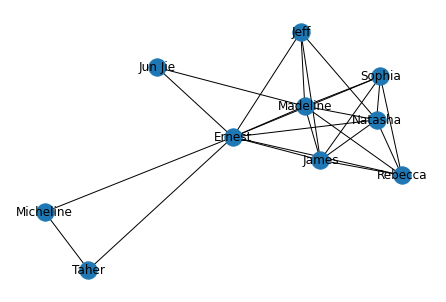

In [54]:
# Plotting the data into a network to visualize it
nx.draw(name, with_labels = True)

## Network Properties/Statistics
#### This network is an undirected network with 10 nodes and 26 edges.

### Density

In [55]:
# Density shows us how complete the graph is 
# How many edges are present in the network compared to the total possible number of edges
density = nx.density(name)
print('The edge density is: %.3f' % (density)) 

The edge density is: 0.533


In [56]:
# The density value of 0.533 indicates that this network is well connected
# We see that there is more than a 50% link among all possible links 

### Degree Centrality

In [57]:
# Degree centrality shows us how many edges each node has
# In this context, it shows us how many friends each person has in common with other people in the network
degree = nx.degree(name)
degree

DegreeView({'Natasha': 6, 'Madeline': 7, 'Rebecca': 5, 'James': 6, 'Ernest': 9, 'Jun Jie': 2, 'Sophia': 5, 'Micheline': 2, 'Taher': 2, 'Jeff': 4})

In [58]:
# Converting the data we got in the previous line into a dataframe for better visualization
pd.DataFrame(degree)

,0,1
0,Natasha,6
1,Madeline,7
2,Rebecca,5
3,James,6
4,Ernest,9
5,Jun Jie,2
6,Sophia,5
7,Micheline,2
8,Taher,2
9,Jeff,4


In [ ]:
# Nodes with the most edges are the most important as they are connected to many other nodes
# In this context, Ernest is the most important because he is connected to the most number of people

### Closeness Centrality

In [59]:
# The closeness centrality measures how quickly a node can travel to the rest of the graph
close = nx.closeness_centrality(name)
pd.DataFrame.from_dict(close, orient = 'index') 

,0
Natasha,0.750000
Madeline,0.818182
Rebecca,0.692308
James,0.750000
Ernest,1.000000
Jun Jie,0.562500
Sophia,0.692308
Micheline,0.562500
Taher,0.562500
Jeff,0.642857


### Betweenness Centrality

In [60]:
# Betweenness centrality is a way of detecting the amount of influence a node has over the flow of info in a graph
# It is commonly used to find nodes that serve as a bridge from 1 part to another
between = nx.betweenness_centrality(name)
pd.DataFrame.from_dict(between, orient = 'index')

,0
Natasha,0.013889
Madeline,0.083333
Rebecca,0.000000
James,0.013889
Ernest,0.472222
Jun Jie,0.000000
Sophia,0.000000
Micheline,0.000000
Taher,0.000000
Jeff,0.000000


In [ ]:
# In this context, Ernest has the highest betweenness centrality
# This means that he is the most important person in this network of friends
# He has the most connections and serves as a bridge from maybe 1 friend to another

## Community Detection

In [61]:
# A large network can be broken down into smaller communities
# Here, we are finding out how many possible communities our friendship network has
from networkx.algorithms.community.modularity_max import greedy_modularity_communities
c = list(greedy_modularity_communities(name))
print(len(c))

2


In [62]:
# Now that we know there may be 2 possible communities, we want to find out who is in each one
community_0 = sorted(c[0])
community_1 = sorted(c[1])

print(community_0)
print(community_1)

['James', 'Jeff', 'Jun Jie', 'Madeline', 'Natasha', 'Rebecca', 'Sophia']
['Ernest', 'Micheline', 'Taher']


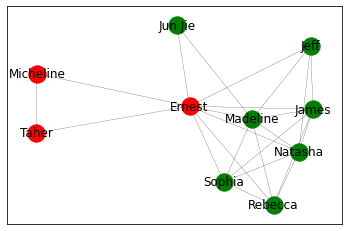

In [63]:
# Printing the results 

# Set seed (optional)
np.random.seed(123)

# Obtain the positions of the nodes
pos = nx.spring_layout(name)

# Print out all the nodes with color
nx.draw_networkx_nodes(name, pos = pos, nodelist=community_0, node_color='green', label = True)
nx.draw_networkx_nodes(name, pos = pos, nodelist=community_1, node_color='red', label = True)

# Print out the edges
nx.draw_networkx_edges(name, pos = pos, width = 0.2)

# Make sure the label is printed
nx.draw_networkx_labels(name, pos=pos)

# Show the plot so it supress the other networkx outputs
plt.show()

### A little big about the communities
#### Our network has 2 communities. This is possibly because Taher is Ernest's younger brother, and Micheline is his girlfriend. Thus, we esee that they are mainly connected to the rest of the network through Ernest. The rest of the network, besides Jun Jie, are one friend group. This makes sense because they are very interconnected. 

## Important Cases

#### As stated above, an important person in the network is Ernest, but another important person is also Madeline. They both have the most number of edges as shown in the degree centrality analysis above. However, Ernest's betweenness centrality score is the highest, which means that he often serves as a bridge from one part of the network to the other. For example, he is the bridge between Micheline and Taher to Sophia and Jeff. He also has the largest closeness centrality, which means he can travel the quickest to any part of the graph. 

## Conclusions

#### To summarize, this was an analysis of a network of friends. Each node/vertex was an individual in the friendship network, and an edge/link/tie would be if they have friends in common with other people in the network. For example, Micheline would have friends in common with Taher and Ernest, thus she has two edges coming out of her node (one to Taher and one to Ernest).

#### We saw that the density score of this network was 0.533. This means that is is well connected and that there is more than a 50% link among all possible links.

#### The degree centrality analysis showed us that Ernest had the highest number of edges coming out of his node (9), followed by Madeline (7), and then James and Natasha (6). The person with the lowest degree centrality score was Taher and Jun Jie, at 2 each. This means that they have the least friends in common with the rest of the people in the network. This could possibly indicate that they could be a part of a different community within the network, and that they are closer/more connected to Ernest/Madeline.

#### The closeness centrality analysis showed us that Ernest had the highest score of 1.0, followed by Madeline at 0.818, then Natasha and James at 0.75. This means that Ernest is the closest to the rest of the network as a whole, which is as expected.

#### Lastly, the betweenness centrality showed us that Ernest had the most amount of influence over the flow of the network. He had a score of 0.47, and serves as a bridge from 1 part of the network to the others. For example, he can serve as a bridge from Micheline or Taher, to Jeff or Sophia. 

#### We see that Ernest is evidently the most important/influential person in this network as he has the most edges coming out of him. After running the community detection test, we learned that there could be 2 possible communities within this network and that Ernest is in between the two. As explained above, this made sense because Taher is Ernest's younger brother. 